In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")

api_key=os.getenv("LANGCHAIN_API_KEY")

In [2]:
from langchain_classic.document_loaders import PyPDFDirectoryLoader
from langchain_classic.document_loaders import PyPDFLoader
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_classic.text_splitter import RecursiveCharacterTextSplitter
from langchain_classic.vectorstores import FAISS

In [3]:
docs=PyPDFLoader("./llm book.pdf")

data=docs.load()

data[0]


Document(metadata={'producer': 'PyPDF', 'creator': 'PyPDF', 'creationdate': '', 'source': './llm book.pdf', 'total_pages': 275, 'page': 0, 'page_label': '1'}, page_content='')

In [4]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=800,chunk_overlap=100)
embeddings=HuggingFaceEmbeddings(model="all-MiniLM-L6-v2")
data_splits=text_splitter.split_documents(data)

vector_store=FAISS.from_documents(documents=data_splits,embedding=embeddings)

retriever=vector_store.as_retriever(search_type="mmr",
    search_kwargs={"k": 8, "fetch_k": 20})

In [5]:
retriever.invoke("what is prompt engineering")

[Document(id='85e7a800-5239-4c82-8dbd-f1da47f530ee', metadata={'producer': 'PyPDF', 'creator': 'PyPDF', 'creationdate': '', 'source': './llm book.pdf', 'total_pages': 275, 'page': 93, 'page_label': '94'}, page_content='Prompt\tEngineering\nPrompt\tengineering\n\tinvolves\tcrafting\tprompts\tthat\teffectively\tcommunicate\tthe\ntask\tat\thand\tto\tthe\tLLM,\tleading\tto\taccurate\tand\tuseful\toutputs\t(\nFigure\t3.1\n).\tIt\tis\na\tskill\tthat\trequires\tan\tunderstanding\tof\tthe\tnuances\tof\tlanguage,\tthe\tspecific\ndomain\tbeing\tworked\ton,\tand\tthe\tcapabilities\tand\tlimitations\tof\tthe\tLLM\tbeing\nused.'),
 Document(id='ba85a557-37a1-427a-8db8-32cb30d7d81d', metadata={'producer': 'PyPDF', 'creator': 'PyPDF', 'creationdate': '', 'source': './llm book.pdf', 'total_pages': 275, 'page': 167, 'page_label': '168'}, page_content="Figure\t5.9\n\t\nA\tpotential\tworkflow\tof\tchained\tprompts\twould\thave\tone\tprompt\ngenerate\tthe\tplan,\tanother\tgenerate\tthe\tstakeholders,\tand

In [6]:
from langchain_classic.tools.retriever import create_retriever_tool

retriever_tool=create_retriever_tool(retriever,
                                     "llm_vector_db",
                                     "Search the vector database for information about llm's"
                                     )

retriever_tool


Tool(name='llm_vector_db', description="Search the vector database for information about llm's", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001CCD9208360>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001CC58FD6270>, search_type='mmr', search_kwargs={'k': 8, 'fetch_k': 20}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000001CCD92098A0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001CC58FD6270>, search_type='mmr', search_kwargs={'k': 8, 'fetch_k': 20}), document_prompt=PromptTemplate(input_var

In [7]:
retriever_tool.invoke("what is chain of  thought prompt")

"Speaking\tof\tchains,\tlet’s\tlook\tat\tone\tof\tthe\tmost\tuseful\tadvancements\tin\nprompting\tto\tdate—chain\tof\tthought.\nChain\tof\tThought\tPrompting\nChain\tof\tthought\tprompting\n\tis\ta\tmethod\tthat\tforces\tLLMs\tto\treason\tthrough\ta\nseries\tof\tsteps,\tresulting\tin\tmore\tstructured,\ttransparent,\tand\tprecise\toutputs.\tThe\ngoal\tis\tto\tbreak\tdown\tcomplex\ttasks\tinto\tsmaller,\tinterconnected\tsub-tasks,\nallowing\tthe\tLLM\tto\taddress\teach\tsub-task\tin\ta\tstep-by-step\tmanner.\tThis\tnot\nonly\thelps\tthe\tmodel\tto\t“focus”\ton\tspecific\taspects\tof\tthe\tproblem\tbut\talso\nencourages\tit\tto\tgenerate\tintermediate\toutputs,\tmaking\tit\teasier\tto\tidentify\tand\ndebug\tpotential\tissues\talong\tthe\tway.\nAnother\tsignificant\tadvantage\tof\tchain\tof\tthought\tprompting\tis\tthe\timproved\ninterpretability\tand\ttransparency\tof\tthe\tLLM-generated\tresponse.\tBy\toffering\n\nside.\nTo\tdo\tthis,\t\nFigure\t5.6\n\tshows\thow\twe\tcan\tutilize\tan\t

In [8]:
medical_docs=PyPDFLoader("./Medical_book.pdf")

med_data=medical_docs.load()

med_data[0]

Document(metadata={'producer': 'PDFlib+PDI 5.0.0 (SunOS)', 'creator': 'PyPDF', 'creationdate': '2004-12-18T17:00:02-05:00', 'moddate': '2004-12-18T16:15:31-06:00', 'source': './Medical_book.pdf', 'total_pages': 637, 'page': 0, 'page_label': '1'}, page_content='')

In [9]:
med_data_splitts=text_splitter.split_documents(med_data)

med_vector_store=FAISS.from_documents(med_data_splitts,embedding=embeddings)

med_retriever=med_vector_store.as_retriever()



In [10]:
med_retriever.invoke("what is acne")

[Document(id='b8fe3ab5-d0e1-4235-b4e0-1d3061535395', metadata={'producer': 'PDFlib+PDI 5.0.0 (SunOS)', 'creator': 'PyPDF', 'creationdate': '2004-12-18T17:00:02-05:00', 'moddate': '2004-12-18T16:15:31-06:00', 'source': './Medical_book.pdf', 'total_pages': 637, 'page': 39, 'page_label': '40'}, page_content='achieved in up to 60% of patients treated with\nGALE ENCYCLOPEDIA OF MEDICINE 226\nAcne\nGEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 26'),
 Document(id='9a3318f9-9f5f-4a4d-842a-0eb3037b592e', metadata={'producer': 'PDFlib+PDI 5.0.0 (SunOS)', 'creator': 'PyPDF', 'creationdate': '2004-12-18T17:00:02-05:00', 'moddate': '2004-12-18T16:15:31-06:00', 'source': './Medical_book.pdf', 'total_pages': 637, 'page': 239, 'page_label': '240'}, page_content='ent purposes. For example, lotions, soaps, gels, and\ncreams containing benzoyl peroxide or tretinoin may be\nused to clear up mild to moderately severe acne.\nIsotretinoin (Accutane) is prescribed only for very\nsevere, disfiguring acne.\nAc

In [11]:
med_retriever_tool=create_retriever_tool(med_retriever,
                                         "medical_vector_db",
                                         "vector database for medical information"
                                         )

### LangGraph Workflow

In [12]:
model=ChatGroq(model="openai/gpt-oss-20b")

model.invoke("hi")

AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "hi". It\'s a greeting. The assistant should respond politely. Probably just "Hello! How can I help you today?"'}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 72, 'total_tokens': 121, 'completion_time': 0.0578174, 'prompt_time': 0.003417746, 'queue_time': 0.042516821, 'total_time': 0.061235146, 'completion_tokens_details': {'reasoning_tokens': 29}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_feb9b278f1', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--350730a2-0b97-49c3-be95-f90f05e195de-0', usage_metadata={'input_tokens': 72, 'output_tokens': 49, 'total_tokens': 121})

In [13]:
from langgraph.graph import MessagesState
def agent_response(state: MessagesState):
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply respond to the user.
    """
    response = (
        model
        .bind_tools([retriever_tool,med_retriever_tool]).invoke(state["messages"])  
    )
    return {"messages": [response]}


In [14]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
agent_response(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello! How can I help you today?


In [15]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "what is acne?",
        }
    ]
}
agent_response(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  medical_vector_db (fc_c44bb914-dfd9-4390-9389-3d17b8b63002)
 Call ID: fc_c44bb914-dfd9-4390-9389-3d17b8b63002
  Args:
    query: acne definition causes types treatments


In [16]:
def route(state: MessagesState):
    last = state["messages"][-1]
    if hasattr(last, "tool_calls") and last.tool_calls:
        return "tools"   # send to tool node
    return "agent_response"


In [17]:
from langgraph.prebuilt import ToolNode

tool_node = ToolNode([retriever_tool, med_retriever_tool])


In [18]:
from langgraph.graph import StateGraph,START,END

graph=StateGraph(MessagesState)
from langgraph.prebuilt import ToolNode

graph.add_node("agent_response", agent_response)
graph.add_node("tools", tool_node)

graph.add_edge(START, "agent_response")
graph.add_conditional_edges("agent_response", route, 
    {"tools": "tools", "agent_response": END}
)

# After tools run, go back to LLM:
graph.add_edge("tools", "agent_response")

graph_builder = graph.compile()


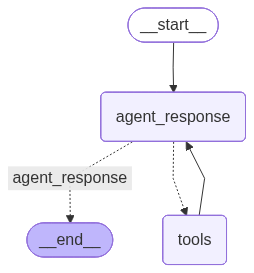

In [19]:
from IPython.display import Image, display
display(Image(graph_builder.get_graph(xray=True).draw_mermaid_png()))


In [20]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "what is acne?",
        }
    ]
}
graph_builder.invoke(input)["messages"]

[HumanMessage(content='what is acne?', additional_kwargs={}, response_metadata={}, id='8ad06b15-5ee9-44d9-a022-03b52dc98742'),
 AIMessage(content='**Acne** (also called acne vulgaris) is a common inflammatory skin condition that primarily affects the hair follicles and the oil (sebaceous) glands that line them. It most often occurs during puberty when hormone levels rise, but it can also affect adults.\n\n### Key points\n\n| Feature | Details |\n|---------|---------|\n| **What it looks like** | Pimples (open comedones or blackheads), closed comedones (whiteheads), inflammatory lesions (papules, pustules, nodules, cysts). |\n| **Where it appears** | Usually the face, chest, shoulders, and upper back. |\n| **Causes** | • Excess oil production by sebaceous glands <br>• Overgrowth of the bacteria *Cutibacterium acnes* (formerly *Propionibacterium acnes*) <br>• Follicular hyperkeratinization (excess skin cells clogging pores) <br>• Hormonal changes, genetics, certain medications, and someti

### project 2

In [21]:
from langgraph.graph import add_messages
from typing import Annotated
from typing_extensions import TypedDict

class AgentState(TypedDict):
    messages : Annotated[list,add_messages]

In [22]:
from langchain.messages import HumanMessage
from langchain_classic.prompts import PromptTemplate
def generate(state:AgentState):

    """  Generating response to the user query"""

    print("Generating response")

    messages=state["messages"]

    question=messages[0].content

    

    prompt = PromptTemplate.from_template("You are a helpful assistant.\n\nQuestion: {question}")

    chain=prompt|model

    response=chain.invoke(question)
    
    return {"messages": [response]}

In [23]:
from langchain.messages import HumanMessage
def rewrite(state:AgentState):
    """
    Rewrite the query to get the desired results
    """

    print("new query pluged-in to the model")
    messages=state["messages"]
    question=messages[0].content

    prompt= f"""
    Rewrite the user question to improve its semantic clarity and retrieval quality:

    Original Question:
    {question}
    """
    msg=[HumanMessage(content=prompt)]

    response=model.invoke(msg)
    return {"messages": [response] }
    

In [24]:
from typing import Literal
def generate_or_rewrite(state:AgentState):

    """  It runs the model to get the response to the user query"""


    print("initial response from generate or rewrite node")

    response=model.invoke(state["messages"])

    return {"messages": [response]}
    

In [25]:
from langchain_classic.prompts import PromptTemplate


def route(state:AgentState)->Literal["generate","rewrite"]:

    "  It decides where to go based on the model response to the user query"

    messages=state["messages"]
    question=messages[0].content
    answer=messages[-1].content

    prompt = PromptTemplate(
            template="""
            You are a query-quality analyzer.

            Determine whether the user's question is clear enough.

            Inputs:
            - Question: "{question}"
            - Model_Response: "{answer}"

            Output:
            Return ONLY "yes" if the question is clear.
            Return ONLY "no" if the question needs rewriting.
            """,
                    input_variables=["question", "answer"],
                )
        
    chain=prompt|model

    response=chain.invoke({"question":question,"answer":answer})

    result = response.content.strip().lower()

    if result == "no":
        print("Routing → REWRITE")
        return "rewrite"

    print("Routing → GENERATE")
    return "generate"

        


In [26]:


graph = StateGraph(AgentState)

graph.add_node("generate", generate)
graph.add_node("rewrite", rewrite)
graph.add_node("generate_or_rewrite", generate_or_rewrite)

graph.add_edge(START, "generate_or_rewrite")

graph.add_conditional_edges(
    "generate_or_rewrite",
    route,
    {
        "generate": "generate",
        "rewrite": "rewrite",
    }
)

graph.add_edge("rewrite", "generate")
graph.add_edge("generate", END)

graph_builder = graph.compile()


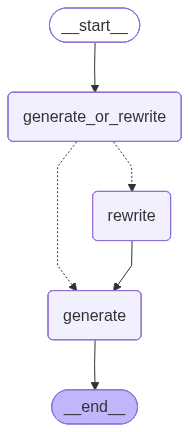

In [27]:
from IPython.display import Image, display
display(Image(graph_builder.get_graph(xray=True).draw_mermaid_png()))

In [28]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "llm ?",
        }
    ]
}
graph_builder.invoke(input)["messages"]

initial response from generate or rewrite node
Routing → REWRITE
new query pluged-in to the model
Generating response


[HumanMessage(content='llm ?', additional_kwargs={}, response_metadata={}, id='ced2bb4e-17f9-45da-adb0-eb22c52db391'),
 AIMessage(content='**LLM** can mean a few different things depending on the context. Here are the most common interpretations:\n\n| Context | Full Form | What It Means |\n|---------|-----------|---------------|\n| **Artificial Intelligence / Machine Learning** | **Large Language Model** | A type of neural network trained on massive amounts of text data. Examples: GPT‑4, Claude, LLaMA. They can generate, translate, summarize, and reason about text. |\n| **Legal Profession** | **Master of Laws** | A postgraduate academic degree in law. It’s usually pursued after completing a first‑degree law program (e.g., JD, LLB) and allows specialization in areas such as tax law, international law, or intellectual property. |\n| **Business / Finance** | **Legal & Litigation Management** (or similar) | In some firms, “LLM” is an internal designation for teams handling legal and litiga